In [1]:
from __future__ import division, print_function

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [3]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)

In [4]:
seed = 7

In [5]:
df_yellow = pd.read_csv('nyctaxi/Yellow_tripdata_2019-10.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
pd.set_option('display.max_columns', 50)

In [ ]:
df_yellow

In [ ]:
df_yellow.info()

### First thing first
* My 'y' is the fare amount
    * Who affects on the fare ammount?
        * distance
        * day (i will extract it)
        * pick up Hour (i will extract it)
        * 
        
### Before doing anything i will split my data

### i will convert date time column to datetime type
* extract day 
* extract hour

In [7]:
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])

# dropna_df['lpep_pickup_date'] = dropna_df['lpep_pickup_datetime'].dt.date
df_yellow['tpep_pickup_hour'] = df_yellow['tpep_pickup_datetime'].dt.hour
# dropna_df['lpep_pickup_day'] = dropna_df['lpep_pickup_datetime'].dt.day
df_yellow['tpep_pickup_weekday'] = df_yellow['tpep_pickup_datetime'].dt.weekday

In [8]:
model = LinearRegression()

# work on x_train v1

### i will visualize if there are any other correlations between the rest of the columns and fare amount

In [23]:
x = df_yellow[['trip_distance', 'tpep_pickup_hour', 'tpep_pickup_weekday']]
y = df_yellow[['fare_amount']]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=seed)

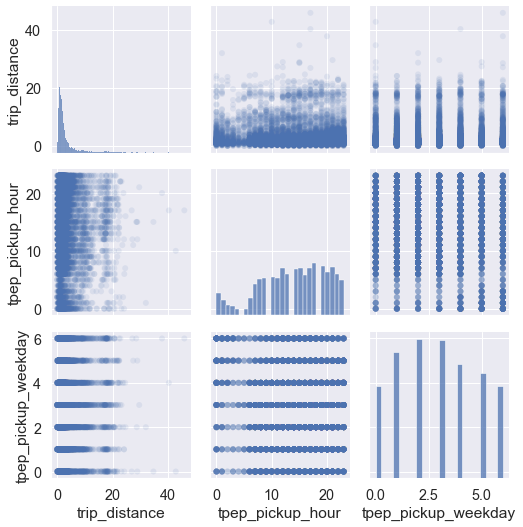

In [24]:
sns.set(font_scale=1.3)
# fig, ax = plt.subplots(figsize=(35,35)) 
sns.pairplot(x_train[:10000], plot_kws=dict(alpha=.1, edgecolor='none'));

In [ ]:
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(x_train.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, annot_kws={"size":16});

In [ ]:
x_train.isna().sum() 

In [25]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.7456834265751068

In [26]:
model.score(x_val, y_val)

0.7441412397851305

# work on x_train v2

In [27]:
x = df_yellow[['trip_distance', 'tpep_pickup_hour', 'tpep_pickup_weekday', 'RatecodeID']]
y = df_yellow[['fare_amount']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=seed)

In [28]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.7603923111916115

In [9]:
df_yellow = df_yellow.loc[df_yellow.RatecodeID.isna() == False]

In [29]:
x = df_yellow[['trip_distance', 'tpep_pickup_hour', 'tpep_pickup_weekday', 'RatecodeID']]
y = df_yellow[['fare_amount']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=seed)

In [30]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.7603923111916115

In [31]:
model.score(x_val, y_val)

0.7483480110657634

### evaluate

In [ ]:
y_train_pred = model.predict(x_train)

plt.scatter(y_train, y_train_pred, alpha=0.2)
plt.plot([0, 400], [0, 400])

In [ ]:
y_test_pred = model.predict(x_val)

plt.scatter(y_val, y_test_pred)
plt.plot([0, 400], [0, 400])

# work on x_train v3

In [32]:
x = df_yellow[['trip_distance', 'tpep_pickup_hour', 'trip_distance','PULocationID','DOLocationID']]
y = df_yellow[['fare_amount']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

In [33]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.7461957752529451

In [34]:
model.score(x_val, y_val)

0.7429423127150292

In [ ]:
df_yellow

In [ ]:
df_yellow.isna().sum()

In [ ]:
df_yellow.loc[df_yellow.fare_amount < 0]

In [ ]:
df_yellow.loc[df_yellow.passenger_count > 4]

# work on x_train v4

In [ ]:
df_feature = df_yellow[['passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'tpep_pickup_hour', 'tpep_pickup_weekday']]


In [35]:
x = df_yellow[['VendorID', 'trip_distance', 'RatecodeID', 'PULocationID', 'extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'tpep_pickup_hour', 'tpep_pickup_weekday']]
y = df_yellow[['fare_amount']]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=seed)

In [36]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.7909791881067305

In [37]:
x_train.isna().sum()

VendorID                 0
trip_distance            0
RatecodeID               0
PULocationID             0
extra                    0
mta_tax                  0
improvement_surcharge    0
congestion_surcharge     0
tpep_pickup_hour         0
tpep_pickup_weekday      0
dtype: int64

In [38]:
df_yellow = df_yellow.loc[df_yellow.VendorID.isna() == False]

In [39]:
x = df_yellow[['VendorID', 'trip_distance', 'RatecodeID', 'PULocationID', 'extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'tpep_pickup_hour', 'tpep_pickup_weekday']]
y = df_yellow[['fare_amount']]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=seed)

In [40]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.7909791881067305

In [41]:
model.score(x_val, y_val)

0.7349583764234575

# work on x_train v5


In [11]:
df_yellow['is_van'] = np.where(df_yellow['passenger_count'] > 4, 1, 0).copy()

In [12]:
def peakHour(h): 
    if h >= 17 and h <= 19:
        return 1
    else:
        return 0

# df_train['is_van'] = np.where(peakHour() , 1, 0)


df_yellow['peakHours'] = df_yellow.loc[:,'tpep_pickup_hour'].apply(peakHour)

In [ ]:
x = df_yellow[[ 'trip_distance', 'congestion_surcharge'
               , 'tpep_pickup_hour', 'tpep_pickup_weekday','is_van'
               , 'peakHours']]


y = df_yellow[['fare_amount']]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=seed)

In [ ]:
model.fit(x_train, y_train)#means train or betas
model.score(x_train, y_train)

In [ ]:
model.score(x_val, y_val)

# work on x_train v6

In [13]:
df_yellow = df_yellow.loc[df_yellow.RatecodeID.isna() == False]
x = df_yellow[[ 'trip_distance', 'RatecodeID', 'congestion_surcharge'
               , 'tpep_pickup_hour', 'tpep_pickup_weekday','is_van'
               , 'peakHours']]


y = df_yellow[['fare_amount']]

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=seed)

In [ ]:
model.fit(x_train, y_train)#means train or betas
model.score(x_train, y_train)

In [ ]:
# model.fit(x_val, y_val)
model.score(x_val, y_val)

# work on x_train v7

In [14]:
df_yellow.RatecodeID = df_yellow.RatecodeID.astype('int')

In [15]:
df_yellow['Standard_rate'] = np.where(df_yellow['RatecodeID'] == 1, 1, 0).copy()
df_yellow['JFK'] = np.where(df_yellow['RatecodeID'] == 2, 1, 0).copy()
df_yellow['Newark'] = np.where(df_yellow['RatecodeID'] == 3, 1, 0).copy()
df_yellow['Nassau_or_Westchester'] = np.where(df_yellow['RatecodeID'] == 4, 1, 0).copy()
df_yellow['Negotiated_fare'] = np.where(df_yellow['RatecodeID'] == 5, 1, 0).copy()
df_yellow['Group_ride'] = np.where(df_yellow['RatecodeID'] == 6, 1, 0).copy()

In [ ]:
# df_yellow.drop(['payment_type','extra','mta_tax','tip_amount','tolls_amount','total_amount','store_and_fwd_flag'], inplace=True,axis=1)

In [ ]:
x = df_yellow[[ 'trip_distance', 'congestion_surcharge'
               , 'tpep_pickup_hour', 'tpep_pickup_weekday'
               
               ,'Standard_rate', 'JFK', 'Newark', 'Nassau_or_Westchester', 'Negotiated_fare', 'Group_ride']]
y = df_yellow[['fare_amount']]

# ,'is_van'
# , 'peakHours'
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=seed)

In [ ]:
model.fit(x_train, y_train)#means train or betas
model.score(x_train, y_train)

In [ ]:
# model.fit(x_val, y_val)
model.score(x_val, y_val)

In [ ]:
# model.fit(x_test, y_test)
# model.score(x_test, y_test)

# work on x_train v8

In [48]:
x = df_yellow[[ 'trip_distance','improvement_surcharge'
               ,'Standard_rate', 'JFK', 'Newark', 'Nassau_or_Westchester', 'Negotiated_fare', 'Group_ride']]
y = df_yellow[['fare_amount']]

# ,'is_van'
# , 'peakHours'
# 'tpep_pickup_hour',
# , 'congestion_surcharge'
# , 'tpep_pickup_weekday'
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)
x_train, x_val,  y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=seed)

In [49]:
model.fit(x_train, y_train)#means train or betas
model.score(x_train, y_train)

0.8233677260225956

In [54]:
model.score(x_val, y_val)

0.8068803534642736

In [21]:
corr_matrix = x_train.corr()

In [22]:
corr_matrix["fare_amount"].sort_values(ascending=False)

fare_amount              1.000000
trip_distance            0.863471
JFK                      0.520858
Negotiated_fare          0.279108
Newark                   0.213781
Nassau_or_Westchester    0.140476
improvement_surcharge    0.099170
Group_ride              -0.001840
Standard_rate           -0.643064
Name: fare_amount, dtype: float64

In [60]:
x = df_yellow[[ 'trip_distance','is_van' , 'peakHours'
               ,'Standard_rate', 'JFK']]
y = df_yellow[['fare_amount']]

# ,'is_van'
# , 'peakHours'
# 'tpep_pickup_hour',
# , 'congestion_surcharge'
# , 'tpep_pickup_weekday'
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)
x_train, x_val,  y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=seed)

In [61]:
model.fit(x_train, y_train)#means train or betas
model.score(x_train, y_train)

0.8073540593680789

In [62]:
model.score(x_val, y_val)

0.8070122582134674

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [56]:
std = StandardScaler()
std.fit(x.values)

StandardScaler()

In [57]:
X_tr = std.transform(x.values)

In [ ]:
# y_train_pred = model.predict(x_train)

# plt.scatter(y_train, y_train_pred, alpha=0.2)
# plt.plot([0, 400], [0, 400])

In [ ]:
# y_test_pred = model.predict(x_val)

# plt.scatter(y_val, y_test_pred)
# plt.plot([0, 400], [0, 400])

In [ ]:
# sns.pairplot(x_train[:10000], plot_kws=dict(alpha=.1, edgecolor='none'))

In [ ]:
# x_train.apply(pd.Series.nunique)

In [ ]:
# df_yellow['is_van'] = np.where(df_yellow['tpep_pickup_hour'] > 16 & df_yellow['tpep_pickup_hour'] < 19 , 1, 0)

In [ ]:
# # Create your model
# model = sm.OLS(y_train, x_train)

# # Fit your model to your training set
# fit = model.fit()

# # Print summary statistics of the model's performance
# fit.summary()

In [ ]:

# def peakHour(h): 
#     if h >= 17 and h <= 19:
#         return 1
#     else:
#         return 0

# # df_train['is_van'] = np.where(peakHour() , 1, 0)


# df_train1['peakHours'] = df_train1.loc[:,'pickup_hour'].apply(peakHour)